In [1]:
import sys,os
sys.path.append("../")
import random

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from utils.plots import visualize_uncertainty, save_fig
from utils.misc import gen_data
from utils.loss import AleatoricLoss
from utils.metrics import mpiw,picp
from model_utils.mlp import MLPNet
from uncertainty.mc_dropout_regression import mc_dropout_eval

/share/home/shiqing/miniconda3/envs/yym/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
device="cuda:0"
net = MLPNet(p=0.5, logvar=True,n_feature=1, n_hidden=32, n_output=1).to(device)
checkpoint = torch.load("../saved_models/regression/deterministic/2023_12_26_14_26_10/mlp.pth",map_location=device)
net.load_state_dict(checkpoint)

<All keys matched successfully>

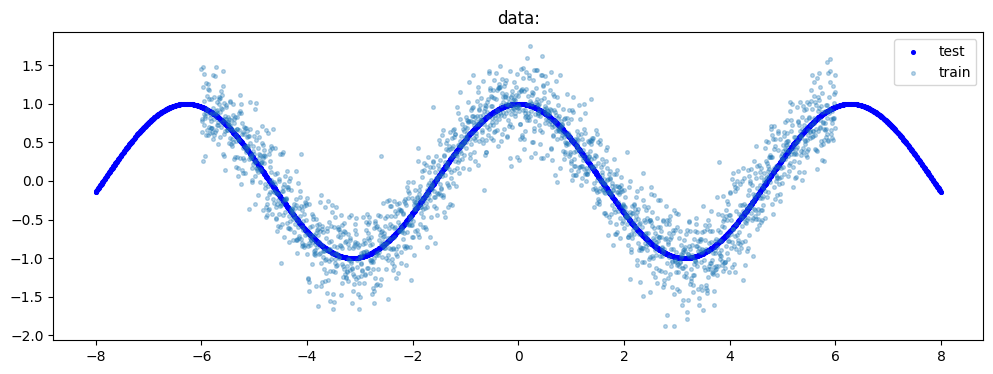

In [4]:
MEAN_FUN = np.cos
x_train, y_train, x_test, y_test = gen_data(mean_fun=MEAN_FUN,std_const=0.3,train_abs=6,test_abs=8,occlude=False, hetero=False)

In [5]:
pred_v, pred_mean,a_u,e_u = mc_dropout_eval(net, x_test.to(device), dropout=True)
print(f"picp:{picp(pred_v,y_test.numpy())}")
print(f"mpiw:{mpiw(pred_v,y_test.numpy())}")

picp:[0.9125]
mpiw:0.8512318434657528


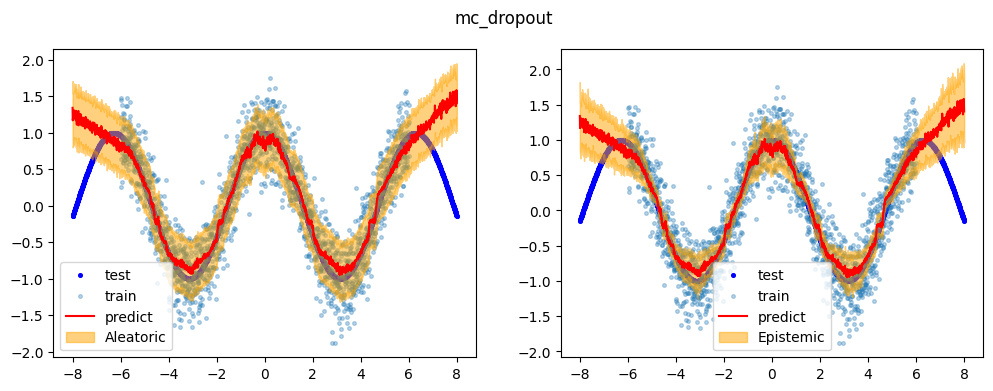

In [6]:
fig_title="mc_dropout"
fig = visualize_uncertainty(fig_title,pred_mean,a_u,e_u, x_train, y_train, x_test, y_test )
save_fig(fig,"../results/mc_dropout_regression/","homo.jpg")